# Movies Data Analysis 🎥

Preparing Required Libraries 📚

In [198]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

This is an one time style notebook charts

In [199]:
# Chart colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#525df4","#ed4a7b","#087783","#3c6372"]) 
# Chart Background
mpl.rcParams['axes.facecolor'] = "#e4f2ffaa"

# Quick title
def plot(x = "", y = "", title = ""):
  plt.title(title)
  plt.xlabel(x)
  plt.ylabel(y)

Importing Data ⏬

In [200]:
data = pd.read_csv("tmdb-movies.csv")

data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


## Let's Deep Dive in Data Set 🧐📊

Data Definition ❔:
- Numeric Data
  - `popularity`, `budget`, `revenue`, `release_year`, `vote_count`, `vote_average`, `runtime`
- Labeled Data
  - `director`, `genres`, `production_companies`, `cast`, `original_title`, `keywords`

### Cleaning 🧼👊

id, imdb_id, homepage, tagline, overview are not important let's drop them 🗑

In [201]:
data = data.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview'], axis=1)

data

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


Let's start discovering if there is missid data

In [202]:
data.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There is a missing values in `cast`, `director`, `keywords`, `genres`, `production_companies`

So I will replace all these missing values with `"MD"` which means Missing Data

In [217]:
# data[data["director"].isna()] = "MD"
# data[data["cast"].isna()] = "MD"
# data[data["keywords"].isna()] = "MD"
# data[data["genres"].isna()] = "MD"
# data[data["production_companies"].isna()] = "MD"

# problem here

In [204]:
data.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [215]:
data[data["budget"] < 30000]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000,2.700677e+07
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000,2.056620e+07
72,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,desert|hunting,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000,4.222338e+04
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000,0.000000e+00
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.000000e+00


<Axes: xlabel='budget_adj', ylabel='revenue_adj'>

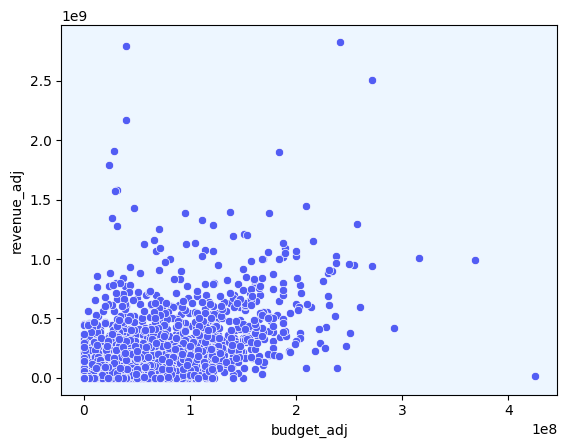

In [206]:
sns.scatterplot(x = 'budget_adj', y = 'revenue_adj', data= data)

There is a lot of outliers 'Data Errors' 🙄 As there is `budget` / `revenue` values equal zero = So we need Data Cleaning 🧼

### EDA 📊👨‍💻🕵️‍♂️

#### Revenue 🤑

Let's See The Invested Budget that the movies companies Every Year

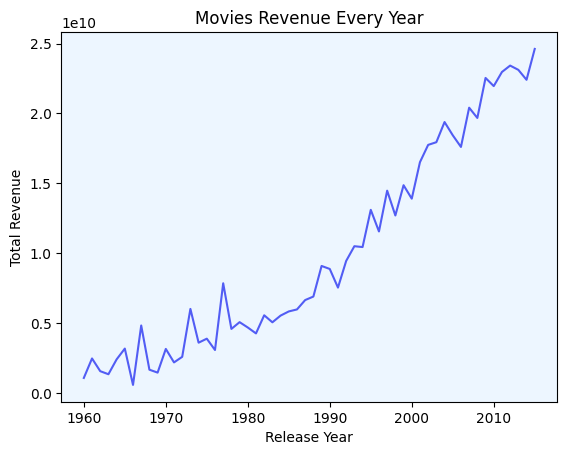

In [207]:
filter = data.groupby("release_year")["revenue_adj"].sum()

plot("Release Year", "Total Revenue", "Movies Revenue Every Year")
plt.plot(filter)

Revenue of Movies are growing massively every year

Let's see top movies that makes large `revenue` according to `Genres`

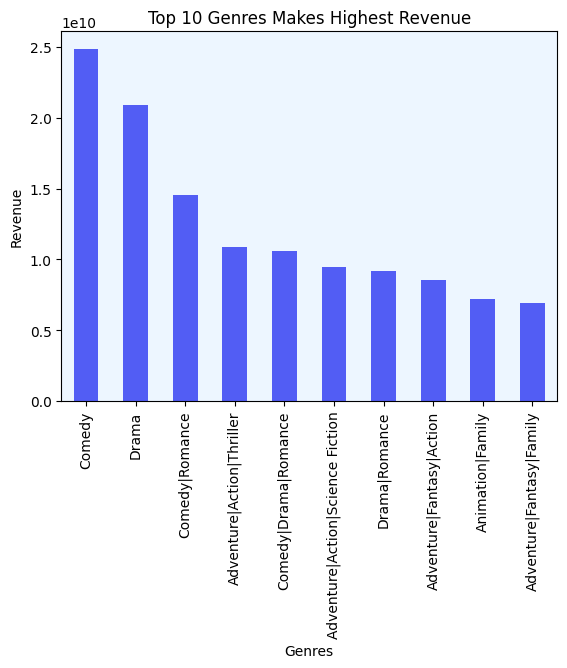

In [208]:
data.groupby("genres")['revenue_adj'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plot("Genres", "Revenue", "Top 10 Genres Makes Highest Revenue")

`Comedy` and `Drama` are in the sky 🤯

Let's see Top Director, Pro Companies makes revenue

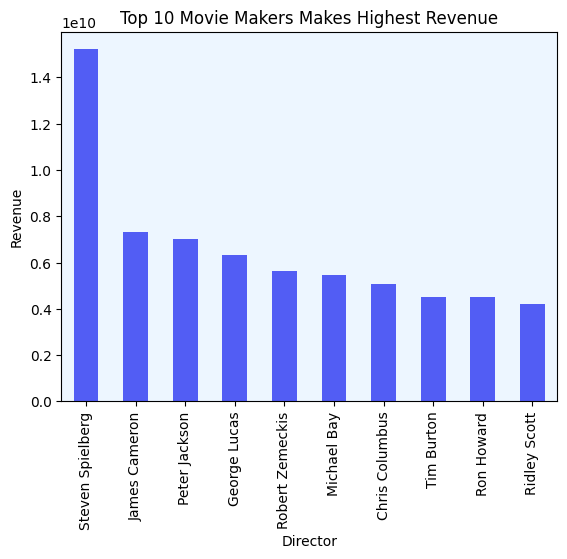

In [209]:
data.groupby("director")['revenue_adj'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plot("Director", "Revenue", "Top 10 Movie Makers Makes Highest Revenue")

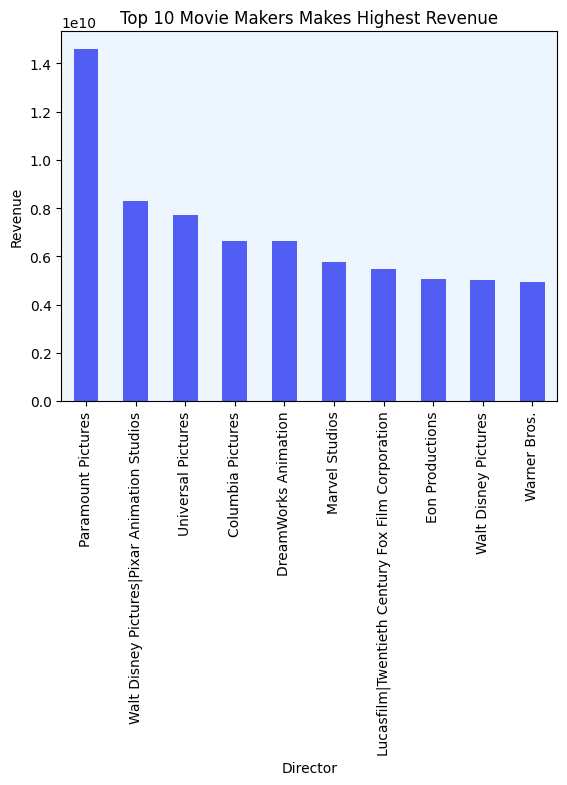

In [210]:
data.groupby("production_companies")['revenue_adj'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plot("Director", "Revenue", "Top 10 Movie Makers Makes Highest Revenue")